# Getting started

In [16]:
from pymultieis.multieis import *

In [17]:
#|hide
import numpy as np
import pandas as pd
import scipy.sparse as sps
import torch

In this example we shall fit simulated impedance data for a redox system. The weighting will be the modulus. First we use the `fit_deterministic` approach. 

In [18]:
F = torch.tensor(np.load('../../../data/redox_exp_50/freq_50.npy'))
Y = torch.tensor(np.load('../../../data/redox_exp_50/Y_50.npy'))
Yerr = torch.tensor(np.load('../../../data/redox_exp_50/sigma_Y_50.npy'))


In [19]:
print(F.shape)
print(Y.shape)
print(Yerr.shape)

torch.Size([45])
torch.Size([45, 50])
torch.Size([45, 50])


In [20]:
def redox(p, f):
    w = 2*torch.pi*f               # Angular frequency
    s = 1j*w                       # Complex variable
    Rs = p[0]
    Qh = p[1]
    nh = p[2]
    Rct = p[3]
    Wct = p[4]
    Rw = p[5]
    Zw = Wct/torch.sqrt(w) * (1-1j) # Planar infinite length Warburg impedance
    Ydl = (s**nh)*Qh                # admittance of a CPE
    Z1 = (1/Zw + 1/Rw)**-1
    Z2 = (Rct+Z1)
    Y2 = Z2**-1
    Y3 = (Ydl + Y2)
    Z3 = 1/Y3
    Z = Rs + Z3
    Y = 1/Z
    return torch.cat((Y.real, Y.imag), dim = 0)


In [21]:
p0 = torch.tensor([1.6295e+02, 3.0678e-08, 9.3104e-01, 1.1865e+04, 4.7125e+05, 1.3296e+06])

bounds = [[1e-15,1e15], [1e-8, 1e2], [1e-1,1e0], [1e-15,1e15], [1e-15,1e15], [1e-15,1e15]]

smf = torch.tensor([100000, 100000, 100000, 100000, 100000, 100000])

In [34]:
eis_redox = Multieis(p0, F, Y, bounds, smf, redox, weight= Yerr, immittance='admittance')

In [35]:
popt, perr, chisqr, chitot, AIC = eis_redox.fit_deterministic2()

Iteration : 1000, Loss : 2.62063e+01
Iteration : 1842, Loss : 2.55806e+01
Optimization complete
total time is 0:00:10.771433 

In [32]:
print(eis_redox)

Multieis(tensor([1.6295e+02, 3.0678e-08, 9.3104e-01, 1.1865e+04, 4.7125e+05, 1.3296e+06]),tensor([8.0000e+00, 2.5000e+01, 4.2000e+01, 5.9000e+01, 7.6000e+01, 9.3000e+01,
        1.2700e+02, 1.6100e+02, 2.4600e+02, 3.1400e+02, 3.9900e+02, 5.0100e+02,
        6.3700e+02, 7.8800e+02, 9.9300e+02, 1.2520e+03, 1.5850e+03, 1.9950e+03,
        2.5120e+03, 3.1620e+03, 3.9810e+03, 5.0120e+03, 6.3100e+03, 7.9430e+03,
        1.0000e+04, 1.2589e+04, 1.5849e+04, 1.9953e+04, 2.5119e+04, 3.1623e+04,
        3.9811e+04, 5.0119e+04, 6.3096e+04, 7.9433e+04, 1.0000e+05, 1.2589e+05,
        1.5849e+05, 1.9953e+05, 2.5119e+05, 3.1623e+05, 3.9811e+05, 5.0119e+05,
        6.3096e+05, 7.9433e+05, 1.0000e+06]),tensor([[4.2250e-07+1.6590e-06j, 3.9804e-07+1.6285e-06j, 3.8347e-07+1.6017e-06j,
          ..., 6.4421e-07+1.5120e-06j, 5.6440e-07+1.4319e-06j,
         5.1246e-07+1.3675e-06j],
        [9.5617e-07+4.4270e-06j, 9.2244e-07+4.3997e-06j, 9.0619e-07+4.3810e-06j,
          ..., 1.2520e-06+3.8289e-06j, 1.1045e

In [25]:
# popt, perr, chisqr, chitot, AIC = eis_redox.fit_sequential(indices = None)

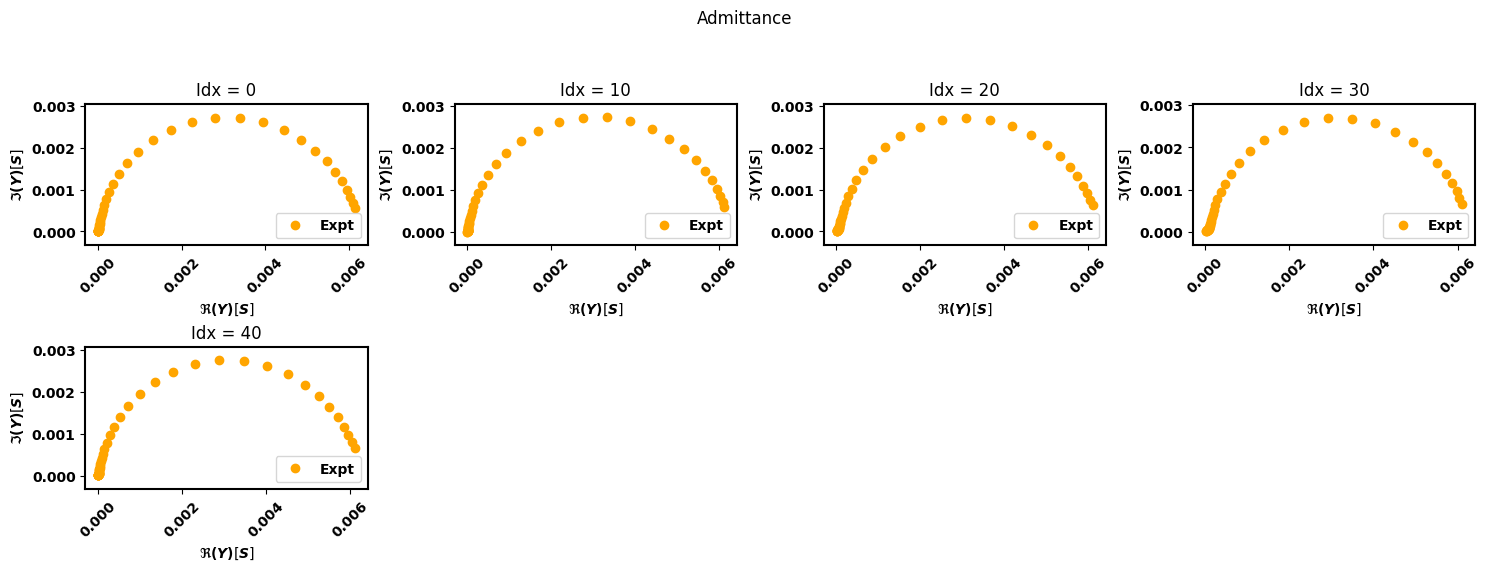

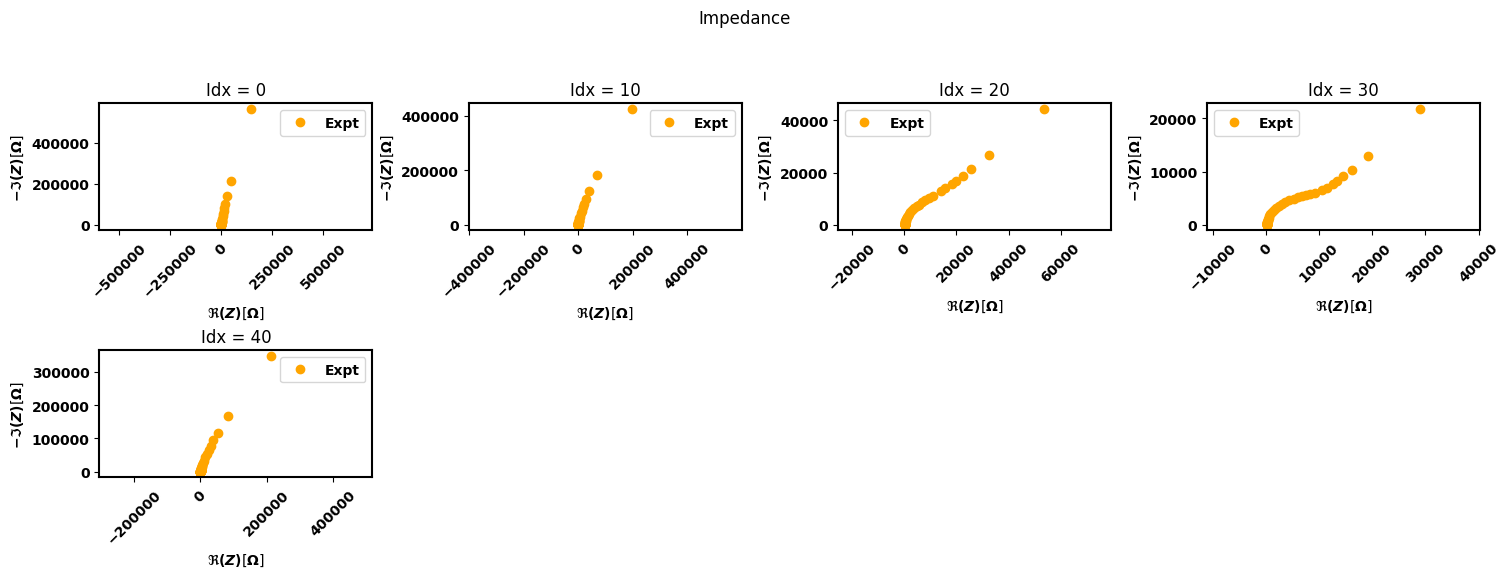

In [33]:
eis_redox.plot_nyquist(10)

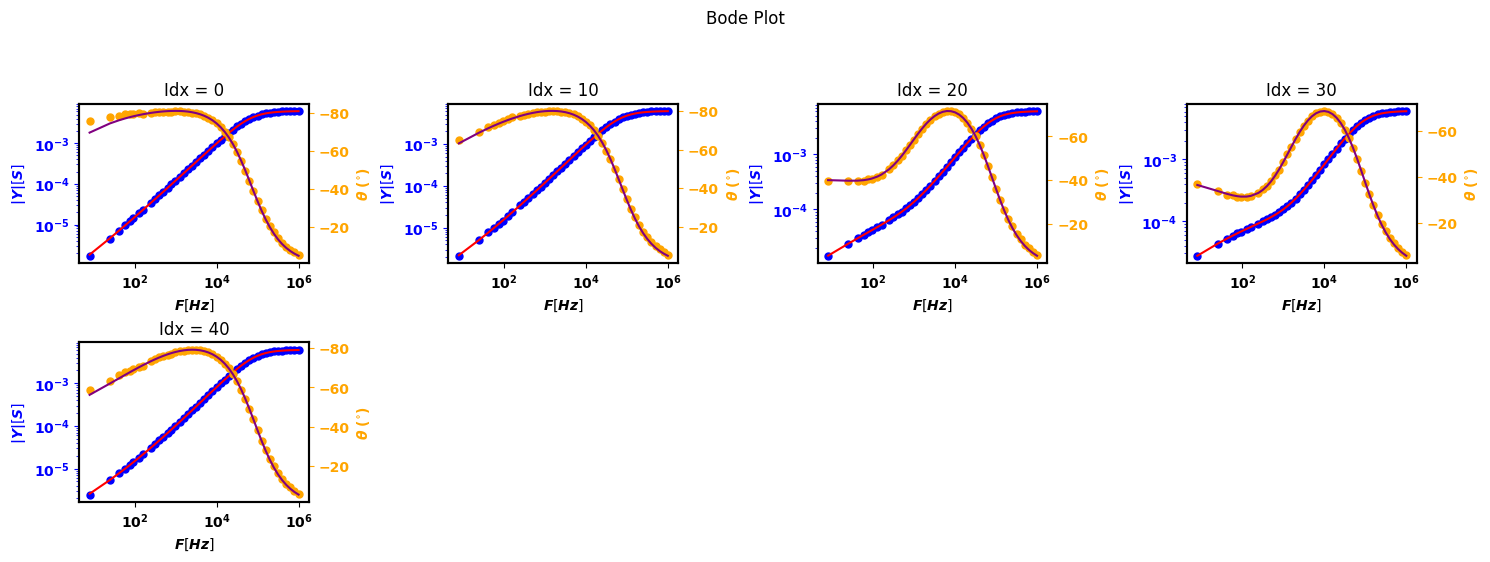

In [27]:
eis_redox.plot_bode(steps = 10)

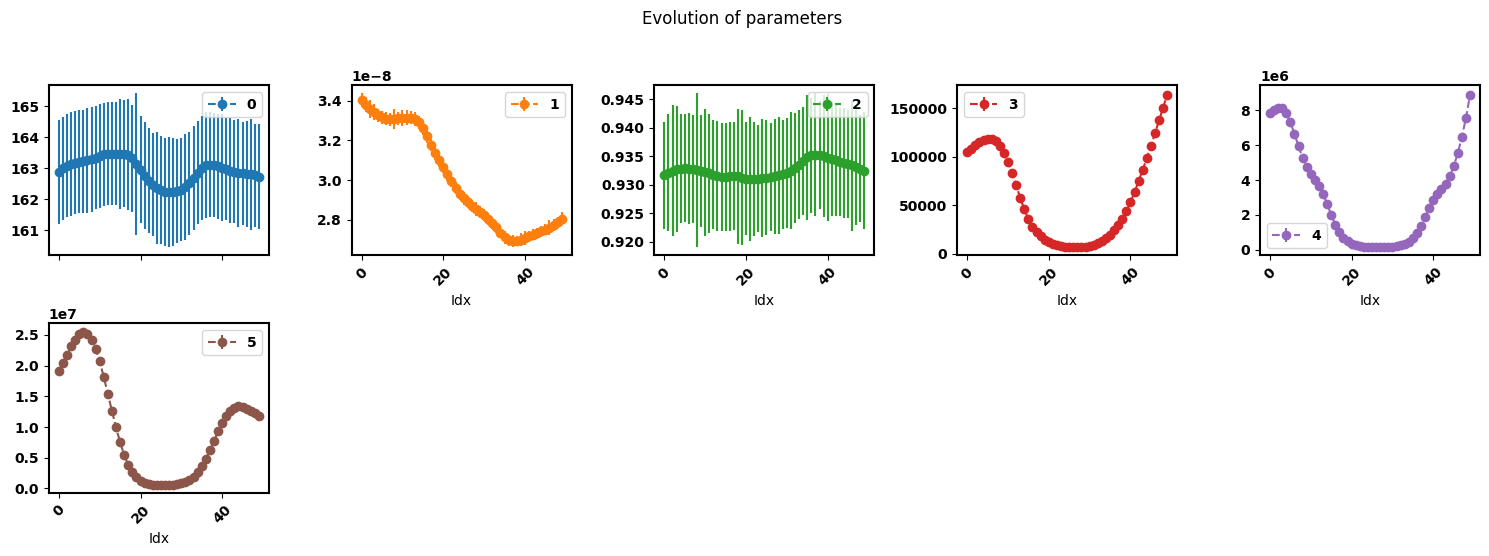

In [28]:
eis_redox.plot_params(True)

In [36]:
eis_redox.save_plot_nyquist(10)
# eis_redox.save_plot_bode(10, fname='redox_exp_seq')
# eis_redox.save_plot_params(False, fname='redox_exp_seq')

                    Calling method with default args


In [30]:
# eis_redox.save_results(fname='redox_exp_seq')